# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Details about imported libraries

# <<<<<<<<<<<<<<<<<  Exploratory Data Analysis (EDA)  >>>>>>>>>>>>>>>>>

# Understanding Dataset_____________________________________________

# Detailes about Dataset's column features 

# Loading Dataset

In [3]:
data = pd.read_csv(r"C:\Users\USER\Desktop\CSE299\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Random display of dataset 

In [4]:
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,1
698,4,127,88,11,155,34.5,0.598,28,0
112,1,89,76,34,37,31.2,0.192,23,0
664,6,115,60,39,0,33.7,0.245,40,1
459,9,134,74,33,60,25.9,0.460,81,0
594,6,123,72,45,230,33.6,0.733,34,0
191,9,123,70,44,94,33.1,0.374,40,0
486,1,139,62,41,480,40.7,0.536,21,0
335,0,165,76,43,255,47.9,0.259,26,0
175,8,179,72,42,130,32.7,0.719,36,1


# Shape of the Dataset

In [5]:
data.shape

(768, 9)

# Dataset columns

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
colnames = list(data.columns)
colnames

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

<AxesSubplot:>

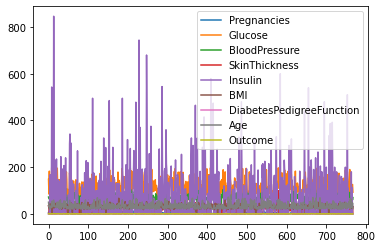

In [8]:
data.plot()

In [9]:
target = colnames[8]
target

'Outcome'

# Checking Unique Values

In [10]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Dataset information and description 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing data checking

<AxesSubplot:>

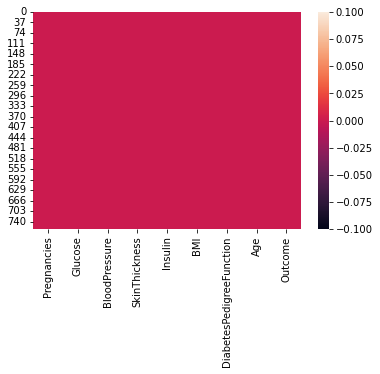

In [13]:
sns.heatmap(data.isnull())

# Checking for Null Values

In [14]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


# Check List of null vaules (No null values found)

In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Cleaning_____________________________________________________

# Dropping off redundant data (SkinThickness,Pregnancies,BloodPressure)

In [16]:
diabetes = data.drop(['SkinThickness','Pregnancies','BloodPressure'], axis=1)

In [17]:
diabetes.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,0,33.6,0.627,50,1
1,85,0,26.6,0.351,31,0
2,183,0,23.3,0.672,32,1
3,89,94,28.1,0.167,21,0
4,137,168,43.1,2.288,33,1


In [18]:
diabetes.sample(5)

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
358,88,54,35.3,0.378,48,0
727,141,0,32.4,0.433,22,0
463,88,0,27.6,0.258,37,0
337,115,0,31.2,0.343,44,1
430,99,0,22.2,0.108,23,0


In [19]:
diabetes.tail(75)

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
693,129,125,38.5,0.439,43,1
694,90,0,23.5,0.191,25,0
695,142,480,30.4,0.128,43,1
696,169,125,29.9,0.268,31,1
697,99,0,25.0,0.253,22,0
...,...,...,...,...,...,...
763,101,180,32.9,0.171,63,0
764,122,0,36.8,0.340,27,0
765,121,112,26.2,0.245,30,0
766,126,0,30.1,0.349,47,1


# Removing ZERO with mean(average) value

In [20]:
diabetes.sample(5)

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
93,134,0,23.8,0.277,60,1
418,83,0,18.2,0.624,27,0
600,108,0,27.1,0.400,24,0
396,96,115,24.7,0.944,39,0
709,93,160,38.0,0.674,23,1


# Checking missing values of new dataset 

<AxesSubplot:>

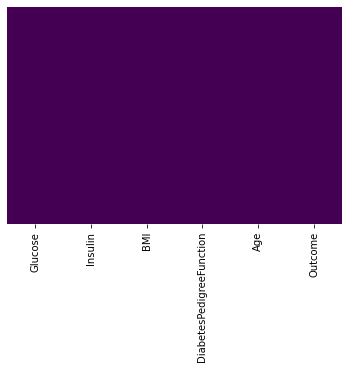

In [21]:
sns.heatmap(diabetes.isnull(),yticklabels= False,cbar = False, cmap='viridis')

# Cleaned dataset summary

In [22]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   Insulin                   768 non-null    int64  
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    int64  
 5   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


# Training & Test Split

In [23]:
X=diabetes.drop("Outcome", axis=1)
Y=diabetes['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
226,101,0,35.7,0.198,26
416,97,0,27.2,1.095,22
6,78,88,31.0,0.248,26
565,95,88,26.1,0.748,22
24,143,146,36.6,0.254,51
...,...,...,...,...,...
269,146,0,27.5,0.240,28
434,90,0,24.5,1.138,36
290,78,40,36.9,0.434,21
139,105,325,36.9,0.159,28


# RELATIONSHIP ANALYSIS__________________________________________

# Dataset Outcome Visualization

Negative (0): 500
Positive (1): 268


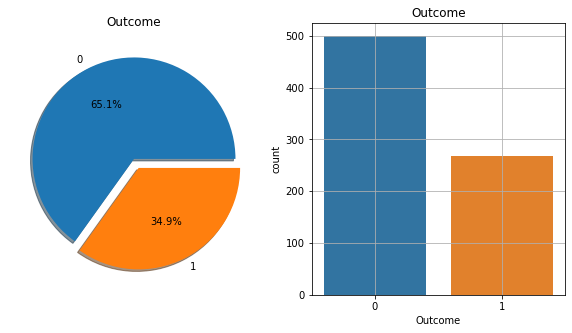

Outcome
0    500
1    268
dtype: int64


In [24]:
f,ax=plt.subplots(1,2,figsize =(10,5))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
N,P = data['Outcome'].value_counts()
print('Negative (0):',N)
print('Positive (1):',P)
plt.grid()
plt.show()
print(diabetes.groupby('Outcome').size())

# Matrix Co-relation

In [25]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

# Clear Look of Matrix Co-relation by Heatmap

<AxesSubplot:>

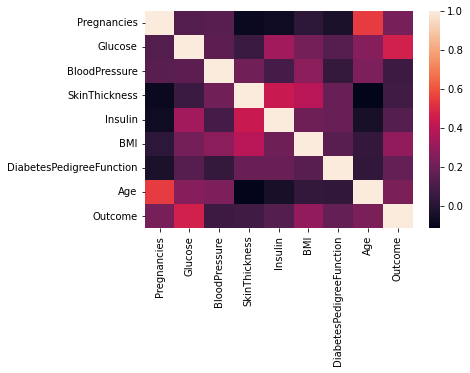

In [26]:
sns.heatmap(correlation)

# Visualization of irrelevant variables for outcome

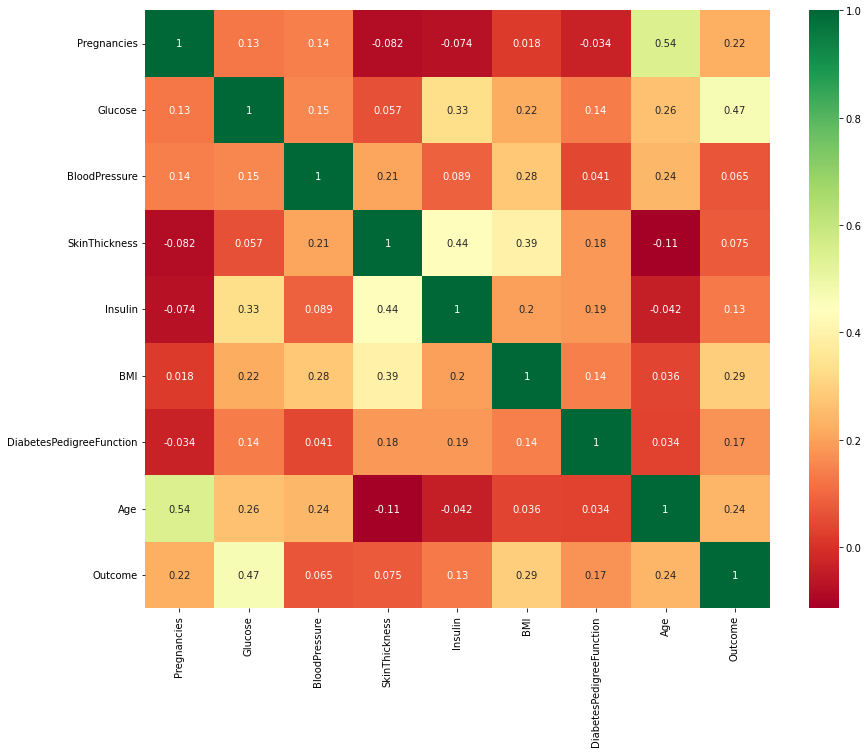

In [27]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# Matrix Co-relationship Heatmap after dropping redundant columns

<AxesSubplot:>

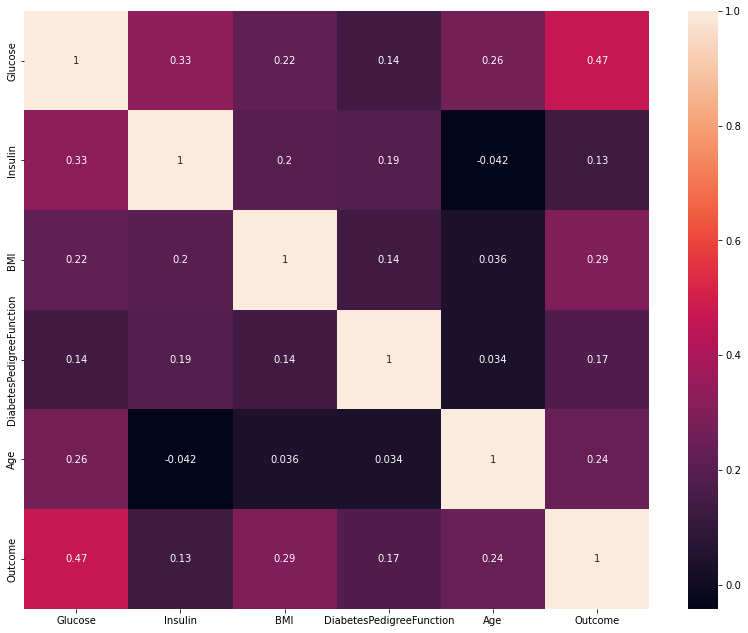

In [28]:
Corelation = diabetes.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
sns.heatmap(Corelation, xticklabels = Corelation.columns, yticklabels = Corelation.columns, annot = True)

# Visualization of importan variables for outcome (After Cleaning)

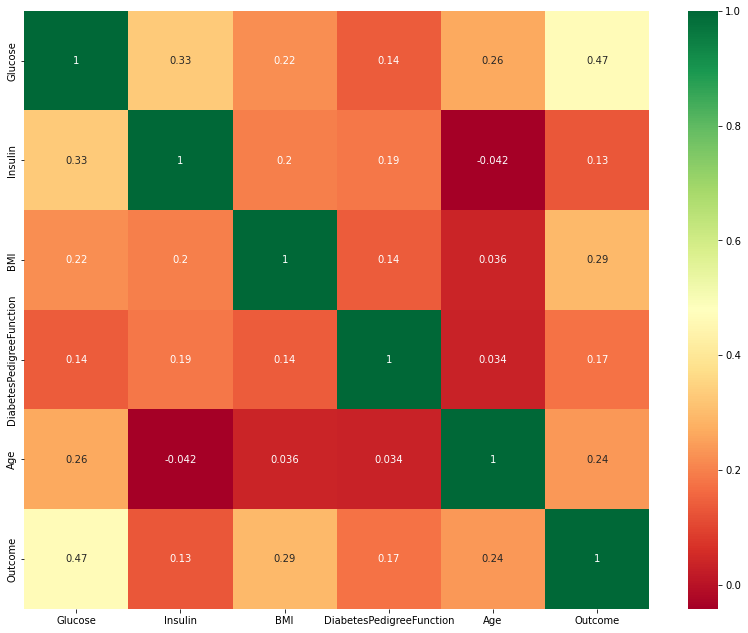

In [29]:
import seaborn as sns
corrmat = diabetes.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
g=sns.heatmap(diabetes[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# Scatter plot

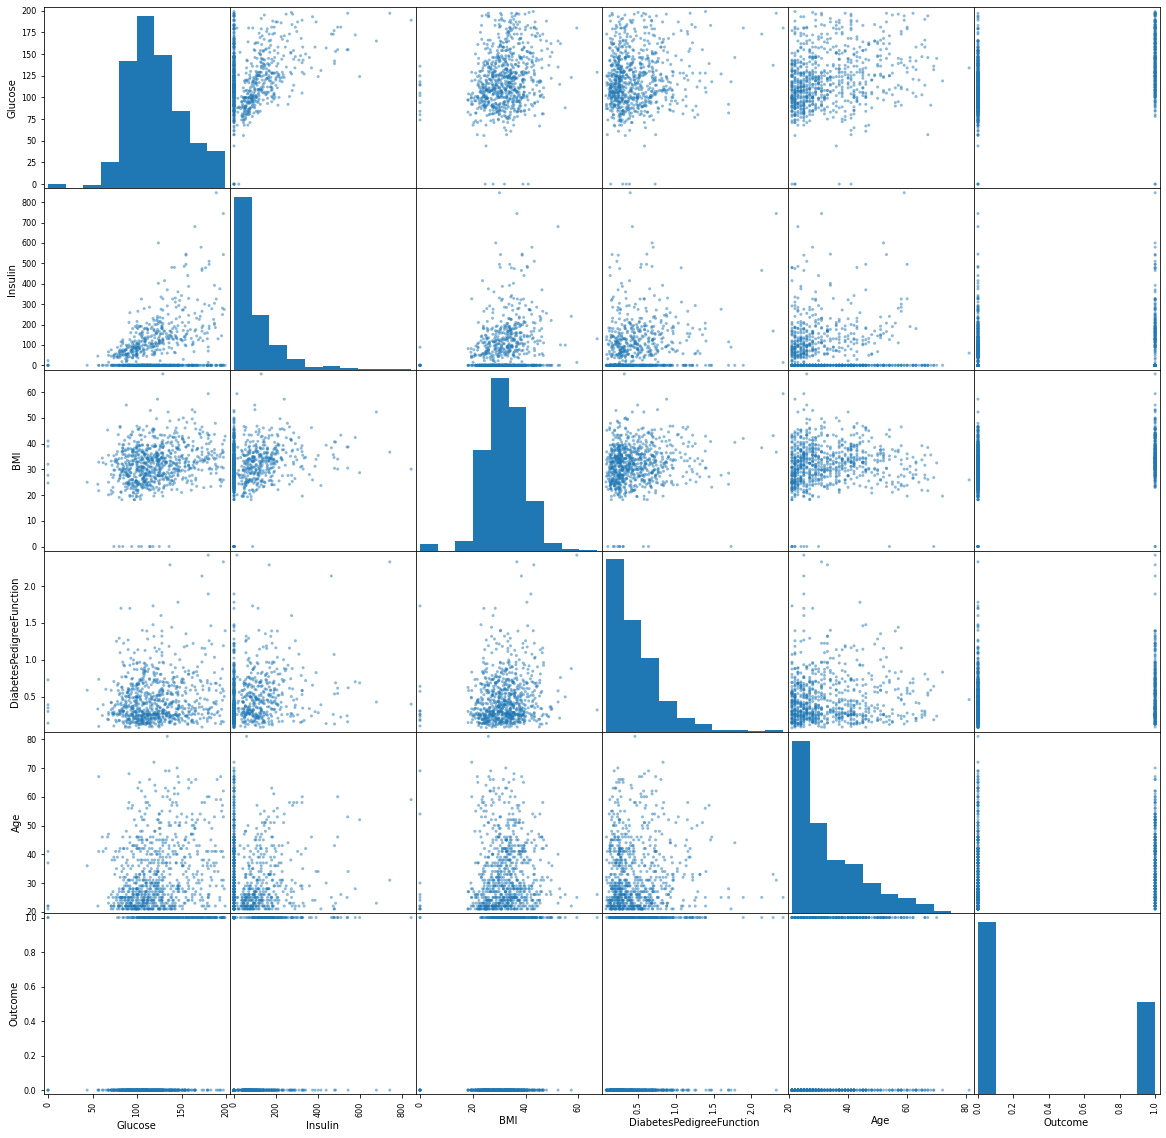

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(diabetes, figsize =(20,20));

# Pairplot

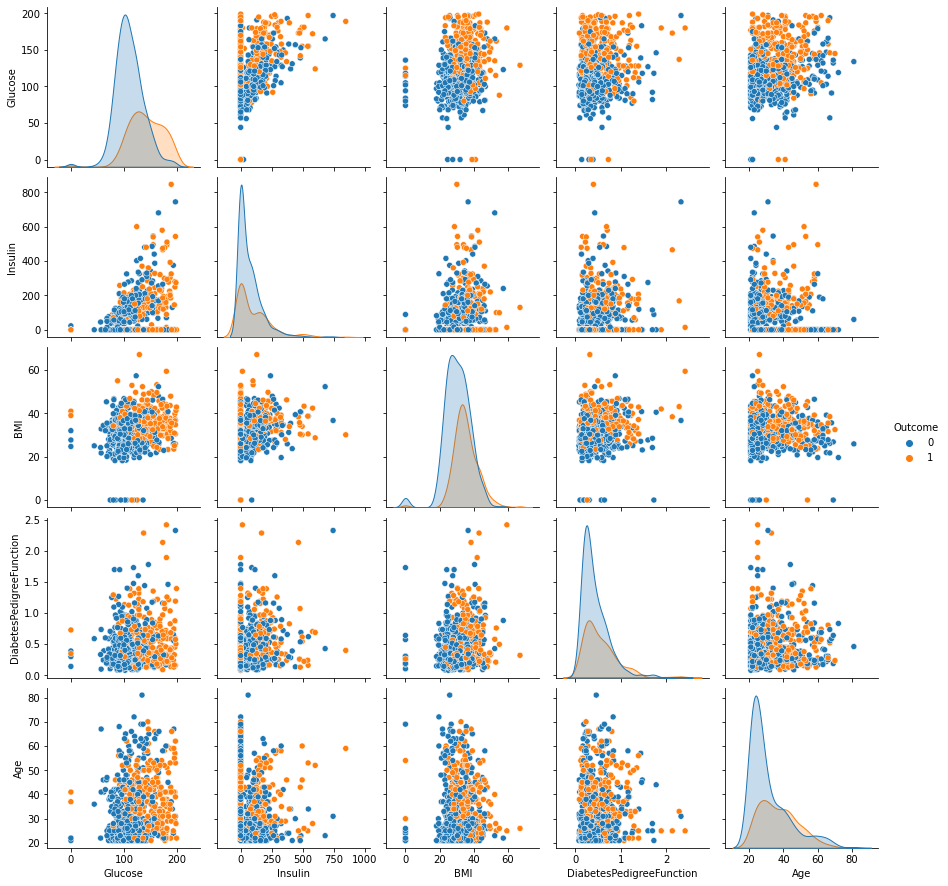

In [31]:
sns.pairplot(data=diabetes,hue = 'Outcome')
plt.show()

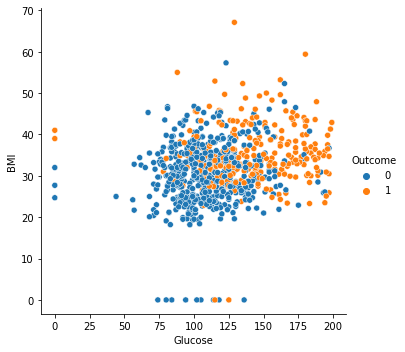

In [32]:
sns.relplot( x = 'Glucose', y = 'BMI', hue = 'Outcome', data = diabetes)

# Histograms

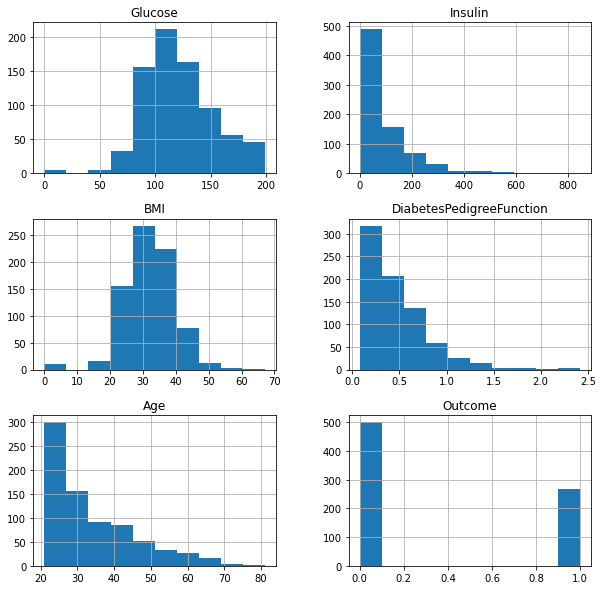

In [33]:
diabetes.hist(bins=10,figsize=(10,10))
plt.show()

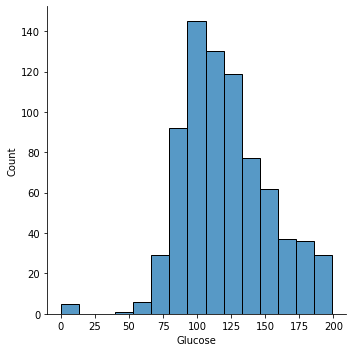

In [34]:
sns.displot(diabetes['Glucose'], bins=15)

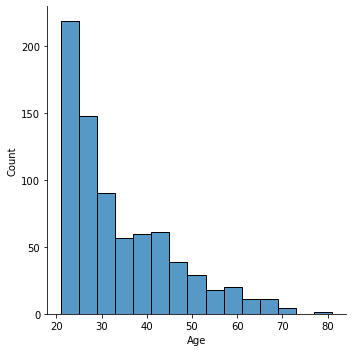

In [35]:
sns.displot(diabetes['Age'], bins=15)

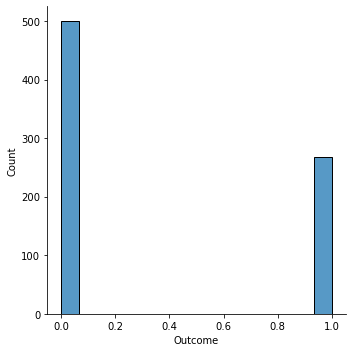

In [36]:
sns.displot(diabetes['Outcome'], bins=15)

# Catplot Realtionship

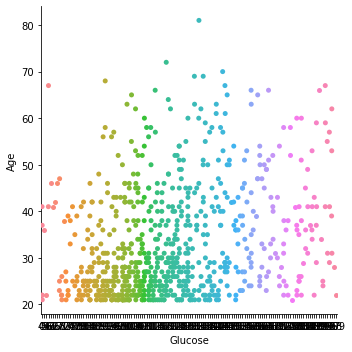

In [37]:
sns.catplot(x='Glucose', y ='Age', data=diabetes)

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<+>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Feature Scaling (Standard Scaler)

In [38]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(SSX, Y, test_size=0.2, random_state=7)

In [40]:
X_train.shape,Y_train.shape

((614, 5), (614,))

In [41]:
X_test.shape,Y_test.shape

((154, 5), (154,))

In [42]:
target = colnames[8]
target

'Outcome'

# Algorithms

Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

KNeighborsClassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

Naive_Bayes Classifier

In [45]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

Support Vector Machine (SVM)

In [46]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,Y_train)

SVC()

Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy')

Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=0)

Multilayer Perceptrons Classifier

In [50]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, Y_train)

MLPClassifier(random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, Y_train)

MLPClassifier(random_state=0)

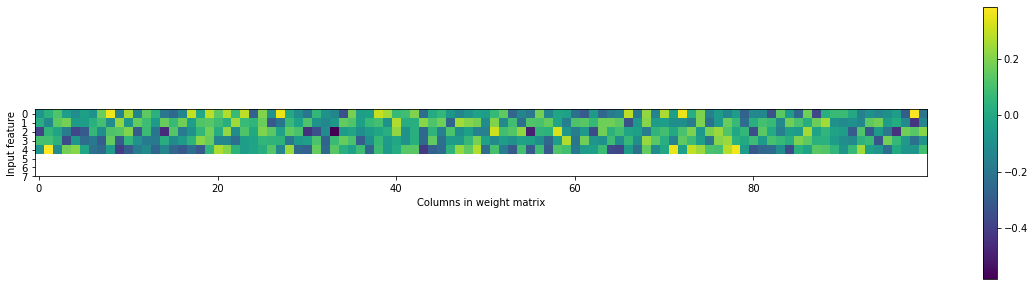

In [52]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8))
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

# Prediction on TEST data

In [53]:
X_test.shape

(154, 5)

Logistic Regression Prediction

In [54]:
lr_pred=lr.predict(X_test)
print(lr_pred)

[0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0]


KNN Prediction

In [55]:
knn_pred=knn.predict(X_test)
print(knn_pred)

[0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0
 1 1 0 1 0 0]


Naive Bayes Prediction

In [56]:
nb_pred=nb.predict(X_test)
print(nb_pred)

[0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 1 1 1 1 0 0]


SVM Prediction

In [57]:
sv_pred=sv.predict(X_test)
print(sv_pred)

[0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 0 0]


Decision Tree Prediction

In [58]:
dt_pred=dt.predict(X_test)
print(dt_pred)

[0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 0 0 1 0 0]


Random Forest Prediction

In [59]:
rf_pred=rf.predict(X_test)
print(rf_pred)

[0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0
 1 0 0 0 0 0]


Gradient Boosting Prediction

In [60]:
gb_pred=gb.predict(X_test)
print(gb_pred)

[0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1
 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 1 0 0 1 0 0]


Multilayer Perceptrons Prediction

In [61]:
mlp_pred=mlp.predict(X_test)
print(mlp_pred)

[0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 0 0]


# Model Evaluation

In [62]:
print('Logistic Regression Train Accuracy',lr.score(X_train,Y_train)*100)
print('Logistic Regression Test Accuracy',lr.score(X_test,Y_test)*100)

Logistic Regression Train Accuracy 77.0358306188925
Logistic Regression Test Accuracy 79.22077922077922


In [63]:
print('KNN Train Accuracy',knn.score(X_train,Y_train)*100)
print('KNN Test Accuracy',knn.score(X_test,Y_test)*100)

KNN Train Accuracy 82.24755700325733
KNN Test Accuracy 74.67532467532467


In [64]:
print('Naive Bayes Train Accuracy',nb.score(X_train,Y_train)*100)
print('Naive Bayes Test Accuracy',nb.score(X_test,Y_test)*100)

Naive Bayes Train Accuracy 76.2214983713355
Naive Bayes Test Accuracy 75.97402597402598


In [65]:
print('SVM Train Accuracy',sv.score(X_train,Y_train)*100)
print('SVM Test Accuracy',sv.score(X_test,Y_test)*100)

SVM Train Accuracy 80.45602605863192
SVM Test Accuracy 82.46753246753246


In [66]:
print('Decision Tree Train Accuracy',dt.score(X_train,Y_train)*100)
print('Decision Tree Test Accuracy',dt.score(X_test,Y_test)*100)

Decision Tree Train Accuracy 100.0
Decision Tree Test Accuracy 72.72727272727273


In [67]:
print('Random Forest Train Accuracy',rf.score(X_train,Y_train)*100)
print('Random Forest Test Accuracy',rf.score(X_test,Y_test)*100)

Random Forest Train Accuracy 100.0
Random Forest Test Accuracy 76.62337662337663


In [68]:
print("Gradient Boosting Train Accuracy:",gb.score(X_train, Y_train)*100)
print("Gradient Boosting Test Accuracy:",gb.score(X_test, Y_test)*100)

Gradient Boosting Train Accuracy: 89.41368078175896
Gradient Boosting Test Accuracy: 77.92207792207793


In [69]:
print("Multilayer Perceptrons Train Accuracy: {:.3f}".format(mlp.score(X_train_scaled, Y_train)*100))
print("Multilayer Perceptrons Test Accuracy: {:.3f}".format(mlp.score(X_test_scaled, Y_test)*100))

Multilayer Perceptrons Train Accuracy: 77.687
Multilayer Perceptrons Test Accuracy: 83.117


# Confusion Matrix

Logistic Regression 

In [70]:
cm=confusion_matrix(Y_test,lr_pred)
cm

array([[87, 10],
       [22, 35]], dtype=int64)

<AxesSubplot:>

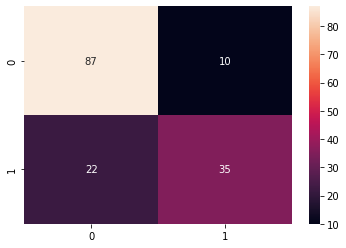

In [71]:
sns.heatmap(confusion_matrix(Y_test,lr_pred),annot=True,fmt='d')

In [72]:
print('Classification Report of Logistic Regression: \n',classification_report(Y_test,lr_pred,digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.7982    0.8969    0.8447        97
           1     0.7778    0.6140    0.6863        57

    accuracy                         0.7922       154
   macro avg     0.7880    0.7555    0.7655       154
weighted avg     0.7906    0.7922    0.7860       154



In [73]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [74]:
TN,FP,FN,TP

(87, 10, 22, 35)

In [143]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,lr_pred)

print('TN -> True Negative {}'.format(cm[0,0]))
print('FP -> Flase Negative {}'.format(cm[0,1]))
print('FN -> False Negative {}'.format(cm[1,0]))
print('TP -> True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate : {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN -> True Negative 87
FP -> Flase Negative 10
FN -> False Negative 22
TP -> True Positive 35
Accuracy Rate: 79.22077922077922
Misclassification Rate : 20.77922077922078


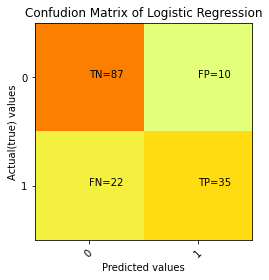

In [76]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation = 'nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confudion Matrix of Logistic Regression')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames, rotation=45)
plt.yticks(tick_marks,classNames)
s= [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+'='+str(cm[i][j]))
plt.show()

In [77]:
pd.crosstab(Y_test, lr_pred, margins=False)

col_0,0,1
Outcome,,
0,87,10
1,22,35


In [78]:
pd.crosstab(Y_test, lr_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,87,10,97
1,22,35,57
All,109,45,154


In [79]:
pd.crosstab(Y_test, lr_pred, rownames=['Actual values'],colnames=['Predict values'],margins=True)

Predict values,0,1,All
Actual values,,,
0,87,10,97
1,22,35,57
All,109,45,154


KNN

In [80]:
cm_knn=confusion_matrix(Y_test,knn_pred)
print(cm_knn)

[[80 17]
 [22 35]]


<AxesSubplot:>

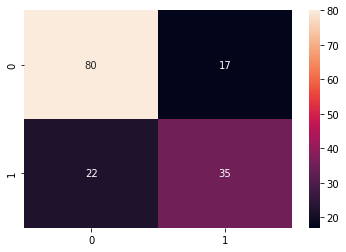

In [81]:
sns.heatmap(confusion_matrix(Y_test,knn_pred),annot=True,fmt='d')

In [82]:
print('Classification Report of KNN: \n',classification_report(Y_test,knn_pred,digits=4))

Classification Report of KNN: 
               precision    recall  f1-score   support

           0     0.7843    0.8247    0.8040        97
           1     0.6731    0.6140    0.6422        57

    accuracy                         0.7468       154
   macro avg     0.7287    0.7194    0.7231       154
weighted avg     0.7431    0.7468    0.7441       154



In [83]:
TN=cm_knn[0,0]
FP=cm_knn[0,1]
FN=cm_knn[1,0]
TP=cm_knn[1,1]

In [84]:
TN,FP,FN,TP

(80, 17, 22, 35)

In [144]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,knn_pred)

print('TN -> True Negative {}'.format(cm_knn[0,0]))
print('FP -> Flase Negative {}'.format(cm_knn[0,1]))
print('FN -> False Negative {}'.format(cm_knn[1,0]))
print('TP -> True Positive {}'.format(cm_knn[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_knn[0,0],cm_knn[1,1]]),np.sum(cm))*100))
print('Misclassification Rate : {}'.format(np.divide(np.sum([cm_knn[0,1],cm_knn[1,0]]),np.sum(cm))*100))

TN -> True Negative 80
FP -> Flase Negative 17
FN -> False Negative 22
TP -> True Positive 35
Accuracy Rate: 74.67532467532467
Misclassification Rate : 25.324675324675322


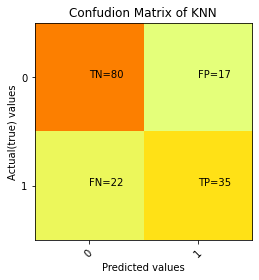

In [85]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm_knn, interpolation = 'nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confudion Matrix of KNN')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames, rotation=45)
plt.yticks(tick_marks,classNames)
s= [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+'='+str(cm_knn[i][j]))
plt.show()

In [86]:
pd.crosstab(Y_test, knn_pred, margins=False)

col_0,0,1
Outcome,,
0,80,17
1,22,35


In [87]:
pd.crosstab(Y_test, knn_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,80,17,97
1,22,35,57
All,102,52,154


In [88]:
pd.crosstab(Y_test, knn_pred, rownames=['Actual values'],colnames=['Predict values'],margins=True)

Predict values,0,1,All
Actual values,,,
0,80,17,97
1,22,35,57
All,102,52,154


Naive Bayes

In [89]:
cm_nb=confusion_matrix(Y_test,nb_pred)
print(cm_nb)

[[83 14]
 [23 34]]


<AxesSubplot:>

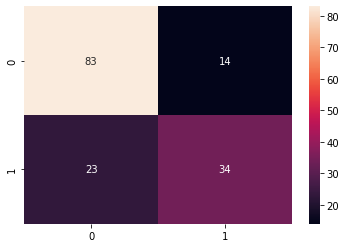

In [90]:
sns.heatmap(confusion_matrix(Y_test,nb_pred),annot=True,fmt='d')

In [91]:
print('Classification Report of Naive Bayes : \n',classification_report(Y_test,nb_pred,digits=4))

Classification Report of Naive Bayes : 
               precision    recall  f1-score   support

           0     0.7830    0.8557    0.8177        97
           1     0.7083    0.5965    0.6476        57

    accuracy                         0.7597       154
   macro avg     0.7457    0.7261    0.7327       154
weighted avg     0.7554    0.7597    0.7548       154



In [92]:
TN=cm_nb[0,0]
FP=cm_nb[0,1]
FN=cm_nb[1,0]
TP=cm_nb[1,1]

In [93]:
TN,FP,FN,TP

(83, 14, 23, 34)

In [145]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,nb_pred)

print('TN -> True Negative {}'.format(cm_nb[0,0]))
print('FP -> Flase Negative {}'.format(cm_nb[0,1]))
print('FN -> False Negative {}'.format(cm_nb[1,0]))
print('TP -> True Positive {}'.format(cm_nb[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_nb[0,0],cm_nb[1,1]]),np.sum(cm))*100))
print('Misclassification Rate : {}'.format(np.divide(np.sum([cm_nb[0,1],cm_nb[1,0]]),np.sum(cm))*100))

TN -> True Negative 83
FP -> Flase Negative 14
FN -> False Negative 23
TP -> True Positive 34
Accuracy Rate: 75.97402597402598
Misclassification Rate : 24.025974025974026


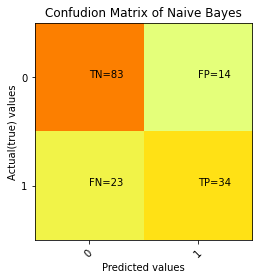

In [94]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm_nb, interpolation = 'nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confudion Matrix of Naive Bayes')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames, rotation=45)
plt.yticks(tick_marks,classNames)
s= [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+'='+str(cm_nb[i][j]))
plt.show()

In [95]:
pd.crosstab(Y_test, nb_pred, margins=False)

col_0,0,1
Outcome,,
0,83,14
1,23,34


In [96]:
pd.crosstab(Y_test, nb_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,83,14,97
1,23,34,57
All,106,48,154


In [97]:
pd.crosstab(Y_test, nb_pred, rownames=['Actual values'],colnames=['Predict values'],margins=True)

Predict values,0,1,All
Actual values,,,
0,83,14,97
1,23,34,57
All,106,48,154


SVM

In [98]:
cm_sv=confusion_matrix(Y_test,sv_pred)
print(cm_sv)

[[89  8]
 [19 38]]


<AxesSubplot:>

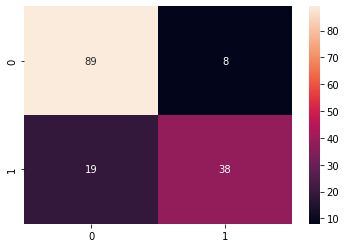

In [99]:
sns.heatmap(confusion_matrix(Y_test,sv_pred),annot=True,fmt='d')

In [100]:
print('Classification Report of Naive Bayes : \n',classification_report(Y_test,sv_pred,digits=4))

Classification Report of Naive Bayes : 
               precision    recall  f1-score   support

           0     0.8241    0.9175    0.8683        97
           1     0.8261    0.6667    0.7379        57

    accuracy                         0.8247       154
   macro avg     0.8251    0.7921    0.8031       154
weighted avg     0.8248    0.8247    0.8200       154



In [101]:
TN=cm_sv[0,0]
FP=cm_sv[0,1]
FN=cm_sv[1,0]
TP=cm_sv[1,1]

In [102]:
TN,FP,FN,TP

(89, 8, 19, 38)

In [146]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,sv_pred)

print('TN -> True Negative {}'.format(cm_sv[0,0]))
print('FP -> Flase Negative {}'.format(cm_sv[0,1]))
print('FN -> False Negative {}'.format(cm_sv[1,0]))
print('TP -> True Positive {}'.format(cm_sv[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_sv[0,0],cm_sv[1,1]]),np.sum(cm))*100))
print('Misclassification Rate : {}'.format(np.divide(np.sum([cm_sv[0,1],cm_sv[1,0]]),np.sum(cm))*100))

TN -> True Negative 89
FP -> Flase Negative 8
FN -> False Negative 19
TP -> True Positive 38
Accuracy Rate: 82.46753246753246
Misclassification Rate : 17.532467532467532


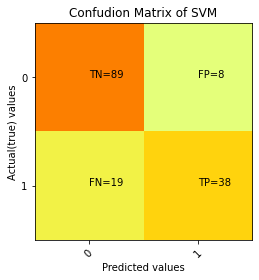

In [103]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm_sv, interpolation = 'nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confudion Matrix of SVM')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames, rotation=45)
plt.yticks(tick_marks,classNames)
s= [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+'='+str(cm_sv[i][j]))
plt.show()

In [104]:
pd.crosstab(Y_test, sv_pred, margins=False)

col_0,0,1
Outcome,,
0,89,8
1,19,38


In [105]:
pd.crosstab(Y_test, sv_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,89,8,97
1,19,38,57
All,108,46,154


In [106]:
pd.crosstab(Y_test, sv_pred, rownames=['Actual values'],colnames=['Predict values'],margins=True)

Predict values,0,1,All
Actual values,,,
0,89,8,97
1,19,38,57
All,108,46,154


Decision Tree

In [107]:
cm_dt=confusion_matrix(Y_test,dt_pred)
print(cm_dt)

[[75 22]
 [20 37]]


<AxesSubplot:>

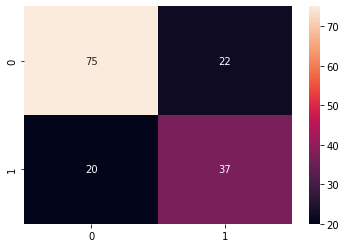

In [108]:
sns.heatmap(confusion_matrix(Y_test,dt_pred),annot=True,fmt='d')

In [109]:
print('Classification Report of Decision Tree : \n',classification_report(Y_test,dt_pred,digits=4))

Classification Report of Decision Tree : 
               precision    recall  f1-score   support

           0     0.7895    0.7732    0.7812        97
           1     0.6271    0.6491    0.6379        57

    accuracy                         0.7273       154
   macro avg     0.7083    0.7112    0.7096       154
weighted avg     0.7294    0.7273    0.7282       154



In [110]:
TN=cm_dt[0,0]
FP=cm_dt[0,1]
FN=cm_dt[1,0]
TP=cm_dt[1,1]

In [111]:
TN,FP,FN,TP

(75, 22, 20, 37)

In [147]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,dt_pred)

print('TN -> True Negative {}'.format(cm_dt[0,0]))
print('FP -> Flase Negative {}'.format(cm_dt[0,1]))
print('FN -> False Negative {}'.format(cm_dt[1,0]))
print('TP -> True Positive {}'.format(cm_dt[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_dt[0,0],cm_dt[1,1]]),np.sum(cm))*100))
print('Misclassification Rate : {}'.format(np.divide(np.sum([cm_dt[0,1],cm_dt[1,0]]),np.sum(cm))*100))

TN -> True Negative 75
FP -> Flase Negative 22
FN -> False Negative 20
TP -> True Positive 37
Accuracy Rate: 72.72727272727273
Misclassification Rate : 27.27272727272727


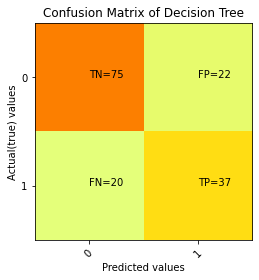

In [112]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm_dt, interpolation = 'nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Decision Tree')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames, rotation=45)
plt.yticks(tick_marks,classNames)
s= [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+'='+str(cm_dt[i][j]))
plt.show()

In [113]:
pd.crosstab(Y_test, dt_pred, margins=False)

col_0,0,1
Outcome,,
0,75,22
1,20,37


In [114]:
pd.crosstab(Y_test, dt_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,75,22,97
1,20,37,57
All,95,59,154


In [115]:
pd.crosstab(Y_test, dt_pred, rownames=['Actual values'],colnames=['Predict values'],margins=True)

Predict values,0,1,All
Actual values,,,
0,75,22,97
1,20,37,57
All,95,59,154


Random Forest

In [116]:
cm_rf=confusion_matrix(Y_test,rf_pred)
print(cm_rf)

[[79 18]
 [18 39]]


<AxesSubplot:>

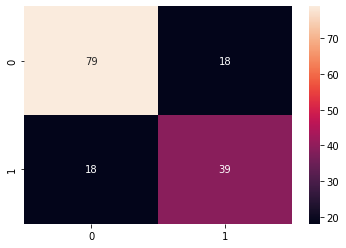

In [117]:
sns.heatmap(confusion_matrix(Y_test,rf_pred),annot=True,fmt='d')

In [118]:
print('Classification Report of Decision Tree : \n',classification_report(Y_test,rf_pred,digits=4))

Classification Report of Decision Tree : 
               precision    recall  f1-score   support

           0     0.8144    0.8144    0.8144        97
           1     0.6842    0.6842    0.6842        57

    accuracy                         0.7662       154
   macro avg     0.7493    0.7493    0.7493       154
weighted avg     0.7662    0.7662    0.7662       154



In [119]:
TN=cm_rf[0,0]
FP=cm_rf[0,1]
FN=cm_rf[1,0]
TP=cm_rf[1,1]

In [120]:
TN,FP,FN,TP

(79, 18, 18, 39)

In [148]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,rf_pred)

print('TN -> True Negative {}'.format(cm_rf[0,0]))
print('FP -> Flase Negative {}'.format(cm_rf[0,1]))
print('FN -> False Negative {}'.format(cm_rf[1,0]))
print('TP -> True Positive {}'.format(cm_rf[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_rf[0,0],cm_rf[1,1]]),np.sum(cm))*100))
print('Misclassification Rate : {}'.format(np.divide(np.sum([cm_rf[0,1],cm_rf[1,0]]),np.sum(cm))*100))

TN -> True Negative 79
FP -> Flase Negative 18
FN -> False Negative 18
TP -> True Positive 39
Accuracy Rate: 76.62337662337663
Misclassification Rate : 23.376623376623375


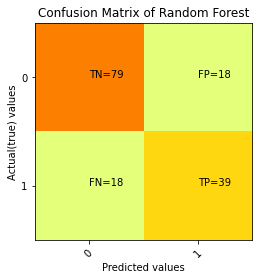

In [121]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm_rf, interpolation = 'nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Random Forest')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames, rotation=45)
plt.yticks(tick_marks,classNames)
s= [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+'='+str(cm_rf[i][j]))
plt.show()

In [122]:
pd.crosstab(Y_test, rf_pred, margins=False)

col_0,0,1
Outcome,,
0,79,18
1,18,39


In [123]:
pd.crosstab(Y_test, rf_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,79,18,97
1,18,39,57
All,97,57,154


In [124]:
pd.crosstab(Y_test, rf_pred, rownames=['Actual values'],colnames=['Predict values'],margins=True)

Predict values,0,1,All
Actual values,,,
0,79,18,97
1,18,39,57
All,97,57,154


Gradient Boosting

In [125]:
cm_gb=confusion_matrix(Y_test,gb_pred)
print(cm_gb)

[[81 16]
 [18 39]]


<AxesSubplot:>

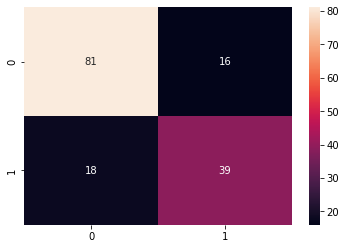

In [126]:
sns.heatmap(confusion_matrix(Y_test,gb_pred),annot=True,fmt='d')

In [127]:
print('Classification Report of Gradient Boosting : \n',classification_report(Y_test,gb_pred,digits=4))

Classification Report of Gradient Boosting : 
               precision    recall  f1-score   support

           0     0.8182    0.8351    0.8265        97
           1     0.7091    0.6842    0.6964        57

    accuracy                         0.7792       154
   macro avg     0.7636    0.7596    0.7615       154
weighted avg     0.7778    0.7792    0.7784       154



In [128]:
TN=cm_gb[0,0]
FP=cm_gb[0,1]
FN=cm_gb[1,0]
TP=cm_gb[1,1]

In [129]:
TN,FP,FN,TP

(81, 16, 18, 39)

In [149]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,gb_pred)

print('TN -> True Negative {}'.format(cm_gb[0,0]))
print('FP -> Flase Negative {}'.format(cm_gb[0,1]))
print('FN -> False Negative {}'.format(cm_gb[1,0]))
print('TP -> True Positive {}'.format(cm_gb[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_gb[0,0],cm_gb[1,1]]),np.sum(cm))*100))
print('Misclassification Rate : {}'.format(np.divide(np.sum([cm_gb[0,1],cm_gb[1,0]]),np.sum(cm))*100))

TN -> True Negative 81
FP -> Flase Negative 16
FN -> False Negative 18
TP -> True Positive 39
Accuracy Rate: 77.92207792207793
Misclassification Rate : 22.07792207792208


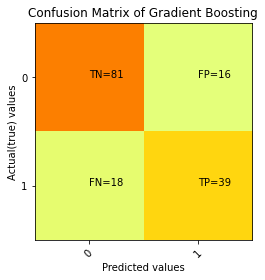

In [130]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm_gb, interpolation = 'nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix of Gradient Boosting')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames, rotation=45)
plt.yticks(tick_marks,classNames)
s= [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+'='+str(cm_gb[i][j]))
plt.show()

In [131]:
pd.crosstab(Y_test, gb_pred, margins=False)

col_0,0,1
Outcome,,
0,81,16
1,18,39


In [132]:
pd.crosstab(Y_test, gb_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,81,16,97
1,18,39,57
All,99,55,154


In [133]:
pd.crosstab(Y_test, gb_pred, rownames=['Actual values'],colnames=['Predict values'],margins=True)

Predict values,0,1,All
Actual values,,,
0,81,16,97
1,18,39,57
All,99,55,154


Multilayer Perceptrons

In [134]:
cm_mlp=confusion_matrix(Y_test,mlp_pred)
print(cm_mlp)

[[87 10]
 [18 39]]


<AxesSubplot:>

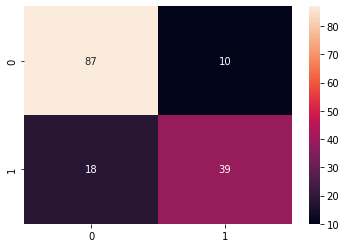

In [135]:
sns.heatmap(confusion_matrix(Y_test,mlp_pred),annot=True,fmt='d')

In [136]:
print('Classification Report of MLP: \n',classification_report(Y_test,mlp_pred,digits=4))

Classification Report of MLP: 
               precision    recall  f1-score   support

           0     0.8286    0.8969    0.8614        97
           1     0.7959    0.6842    0.7358        57

    accuracy                         0.8182       154
   macro avg     0.8122    0.7906    0.7986       154
weighted avg     0.8165    0.8182    0.8149       154



In [137]:
TN=cm_mlp[0,0]
FP=cm_mlp[0,1]
FN=cm_mlp[1,0]
TP=cm_mlp[1,1]

In [138]:
TN,FP,FN,TP

(87, 10, 18, 39)

In [150]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,mlp_pred)

print('TN -> True Negative {}'.format(cm_mlp[0,0]))
print('FP -> Flase Negative {}'.format(cm_mlp[0,1]))
print('FN -> False Negative {}'.format(cm_mlp[1,0]))
print('TP -> True Positive {}'.format(cm_mlp[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm_mlp[0,0],cm_mlp[1,1]]),np.sum(cm))*100))
print('Misclassification Rate : {}'.format(np.divide(np.sum([cm_mlp[0,1],cm_mlp[1,0]]),np.sum(cm))*100))

TN -> True Negative 87
FP -> Flase Negative 10
FN -> False Negative 18
TP -> True Positive 39
Accuracy Rate: 81.81818181818183
Misclassification Rate : 18.181818181818183


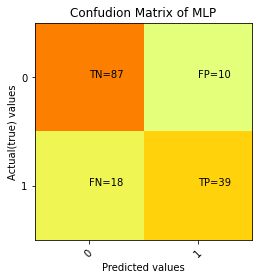

In [139]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm_mlp, interpolation = 'nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confudion Matrix of MLP')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks,classNames, rotation=45)
plt.yticks(tick_marks,classNames)
s= [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+'='+str(cm_mlp[i][j]))
plt.show()

In [140]:
pd.crosstab(Y_test, mlp_pred, margins=False)

col_0,0,1
Outcome,,
0,87,10
1,18,39


In [141]:
pd.crosstab(Y_test, mlp_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,87,10,97
1,18,39,57
All,105,49,154


In [142]:
pd.crosstab(Y_test, mlp_pred, rownames=['Actual values'],colnames=['Predict values'],margins=True)

Predict values,0,1,All
Actual values,,,
0,87,10,97
1,18,39,57
All,105,49,154
